In [16]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
%matplotlib inline

plotting.setup_mpl()

In [17]:
session = ff1.get_session(2022, 'Mexico', 'Q')
session.load()

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['63', '6', '47', '18', '10', '3', '14', '24', '31', '23', '22', '77', '4', '55', '11', '16', '1', '44', '5', '20']


In [18]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
rus_lap = session.laps.pick_driver('RUS').pick_fastest()

ver_lap = ver_lap.get_car_data().add_distance()
ham_lap = ham_lap.get_car_data().add_distance()
rus_lap = rus_lap.get_car_data().add_distance()

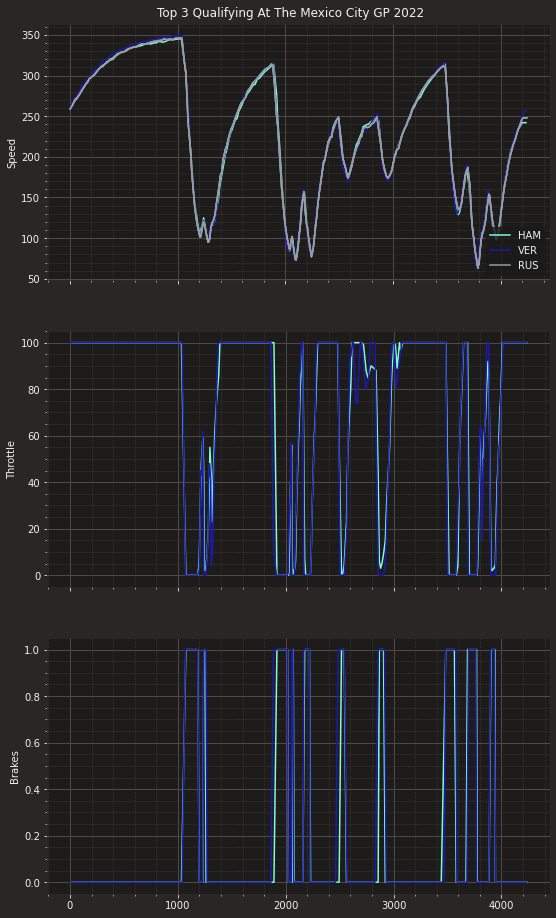

In [19]:
fig, ax = plt.subplots(3, figsize = (9, 16))
fig.suptitle("Top 3 Qualifying At The Mexico City GP 2022", y=0.895)

ax[0].plot(ham_lap['Distance'], ham_lap['Speed'], color='#7FFFD4', label='HAM')
ax[0].plot(ver_lap['Distance'], ver_lap['Speed'], color='#1D19AC', label='VER')
ax[0].plot(rus_lap['Distance'], rus_lap['Speed'], color='#979DA6', label='RUS')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ham_lap['Distance'], ham_lap['Throttle'], color='#7FFFD4', label='HAM')
ax[1].plot(ver_lap['Distance'], ver_lap['Throttle'], color='#1D19AC', label='VER')
ax[0].plot(rus_lap['Distance'], rus_lap['Speed'], color='#979DA6', label='RUS')
ax[1].set(ylabel='Throttle')

ax[2].plot(ham_lap['Distance'], ham_lap['Brake'], color='#7FFFD4', label='HAM')
ax[2].plot(ver_lap['Distance'], ver_lap['Brake'], color='#1D19AC', label='VER')
ax[0].plot(rus_lap['Distance'], rus_lap['Speed'], color='#979DA6', label='RUS')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()